**Background**

Internal bleeding can be a serious medical problem and there is a lack in the range of remedies available for external bleeding. *Internal clotting agents* are a valuable treatment in such cases. Before they can be brought to market, drugs must first be proven to be effective and safe in a series of experiments, which typically start with animal studies. Chernick and Friis (Introductory Biostatistics for the Health Sciences, Wiley, Hoboken,2003, pp. 163–164) describe one such study with pigs. 

**Problem**

Ten pigs were randomly assignedto a treatment group with a new clotting agent and 10 pigs were assigned to a control groupthat did not receive the clotting agent. Each pig’s liver was injured in a specified controlledmanner and the blood loss was measured. 

**H0**: The treatment has no effect and there is no difference in the average blood loss between the two groups except for what chance might produce.

**HA**: The treatement is indeed an improvement ( blood clotting agent ensures less blood dispersion)

**Resampling procedure**
1. Write down blood looss for each pig and place in a 'box'
2. Shuffle 'box' and draw randomly with (or without) replacement 
3. Find the mean of each resample, subtract mean1 - mean2, record difference
4. Repeat step 2,3 1000  more times and find out how often a result as extreme as the observed or smaller (original mean1 -mean 2) happens

---


In [17]:
#Data
import pandas as pd
data = {
    'Control Group': [786, 375, 4446, 2886,478,587,434,4764,3281,3837],
    'Treatement Group': [543,666, 455,823,1716,797,2828,1251,702,1078]
}
#Data Frame
my_data = pd.DataFrame(data)

#View
display(my_data)

#Statistics
control_mean = my_data['Control Group'].mean()
treatement_mean = my_data['Treatement Group'].mean()
t_minus_c = treatement_mean-control_mean

print('Mean blood loss for control group: ',control_mean)
print('Mean blood loss for treatement group: ', treatement_mean)
print('Difference in means (treatment - control: ',  t_minus_c)

,Control Group,Treatement Group
0,786,543
1,375,666
2,4446,455
3,2886,823
4,478,1716
5,587,797
6,434,2828
7,4764,1251
8,3281,702
9,3837,1078


Mean blood loss for control group:  2187.4
Mean blood loss for treatement group:  1085.9
Difference in means (treatment - control:  -1101.5


P-value:  0.047  with a 95% CL and an alpha of 5% we are bound to reject the null hypothesis in favor of the alternative. The results are statistically significant- the new treatement seems to be effective (statistically speaking).




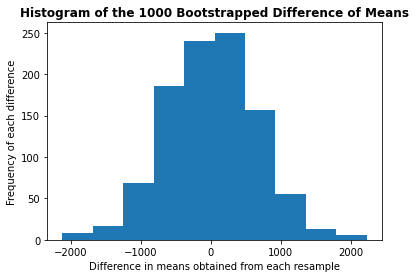

<Figure size 3600x1440 with 0 Axes>

In [74]:
''' Now, our goal is to check how often  (probable) the even treatment - control equals -1101.5 or less. The reason for doing this is to determine whether the treatement is indeed effective, or whether this result was simply due to lack. Hence, if our simulation yields this result with a great frequency than we know that chance can explain it, but if such event is rare, than we can indeed determine that the treatement is to be deemed responsible.'''
import numpy as np
difference = []
merge_data= my_data['Control Group'].append(my_data['Treatement Group'],ignore_index=True )

#1000 trials (resample with replacement)
for x in range(1000):
  control_group = []
  treatement_group = []
  #Resample 10 observations for Control, and 10 for Treatement group
  for y in range(10):
    #Control (randomize as much as possible)
    np.random.shuffle(merge_data)
    index = np.random.randint(0,20)
    control_group.append(merge_data[index])

    #Treatment
    np.random.shuffle(merge_data)
    index = np.random.randint(0,20)
    treatement_group.append(merge_data[index])
  
  diff = float(np.array(treatement_group).mean()- np.array(control_group).mean())
  difference.append(diff)

#Conclusion, let us calculate the p-value
p_value = sum(np.array(difference) < -1101.5)/1000
print('P-value: ', p_value, ' with a 95% CL and an alpha of 5% we are bound to reject the null hypothesis in favor of the alternative. The results are statistically significant- the new treatement seems to be effective (statistically speaking).')
print('\n')

#Graphical reppresentation 
import matplotlib.pyplot as plt
_=plt.hist(sorted(difference))
_=plt.title('Histogram of the 1000 Bootstrapped Difference of Means', fontweight='bold')
_=plt.xlabel('Difference in means obtained from each resample')
_=plt.ylabel('Frequency of each difference')
_=plt.figure(figsize=(50,20))
_=plt.show()


10
